In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4
from pprint import pprint as pp
import warnings 

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
sample_datasets = [
  './cgls_data/2016/c_gls_SSM1km_201601010000_CEURO_S1CSAR_V1.1.1.nc',
  './cgls_data/2016/c_gls_SSM1km_201601020000_CEURO_S1CSAR_V1.1.1.nc',
  './cgls_data/2016/c_gls_SSM1km_201601030000_CEURO_S1CSAR_V1.1.1.nc',
  './cgls_data/2016/c_gls_SSM1km_201601040000_CEURO_S1CSAR_V1.1.1.nc',
  './cgls_data/2016/c_gls_SSM1km_201601050000_CEURO_S1CSAR_V1.1.1.nc',
]

dataset = sample_datasets[2]

plot1 = netCDF4.Dataset(sample_datasets[0])
plot2 = netCDF4.Dataset(sample_datasets[1])
plot3 = netCDF4.Dataset(sample_datasets[2])
plot4 = netCDF4.Dataset(sample_datasets[3])
plot5 = netCDF4.Dataset(sample_datasets[4])

In [4]:
data = netCDF4.Dataset(dataset)
pp(data.variables.keys())

dict_keys(['lat', 'lon', 'time', 'crs', 'ssm', 'ssm_noise'])


In [5]:
pp(data.variables['lat'])
pp("-"*80)
pp(data.variables['lon'])
pp("-"*80)
pp(data.variables['time'])
pp("-"*80)
pp(data.variables['crs'])
pp("-"*80)
pp(data.variables['ssm'])
pp("-"*80)
pp(data.variables['ssm_noise'])

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    valid_range: [35. 72.]
unlimited dimensions: 
current shape = (4144,)
filling on, default _FillValue of 9.969209968386869e+36 used
'--------------------------------------------------------------------------------'
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    valid_range: [-11.  50.]
unlimited dimensions: 
current shape = (6832,)
filling on, default _FillValue of 9.969209968386869e+36 used
'--------------------------------------------------------------------------------'
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1970-01-01 12:00:00
    calendar: standard
    standard_name: time
    long_name: time
    axis: T
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+

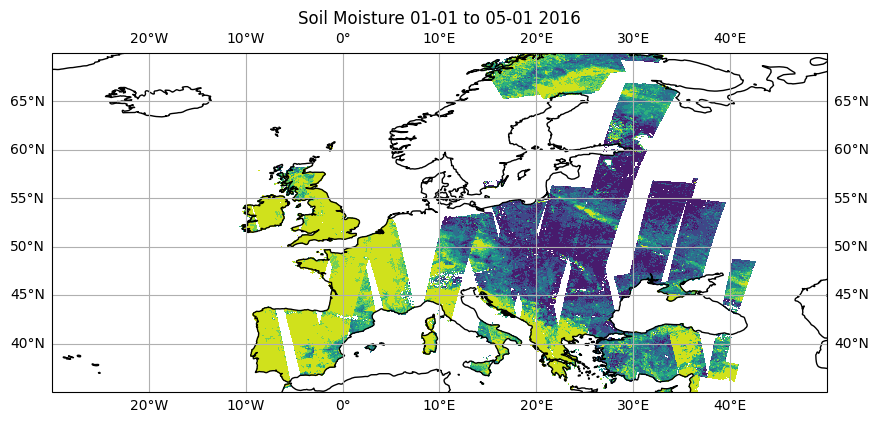

In [6]:
# Use cartopy to plot the data over a basemap
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-30, 50, 35, 70], crs=ccrs.PlateCarree())
ax.title.set_text('Soil Moisture 01-01 to 05-01 2016')
ax.contourf(plot1.variables['lon'][:], plot1.variables['lat'][:], plot1.variables['ssm'][0, :, :])
ax.contourf(plot2.variables['lon'][:], plot2.variables['lat'][:], plot2.variables['ssm'][0, :, :])
ax.contourf(plot3.variables['lon'][:], plot3.variables['lat'][:], plot3.variables['ssm'][0, :, :])
ax.contourf(plot4.variables['lon'][:], plot4.variables['lat'][:], plot4.variables['ssm'][0, :, :])
ax.contourf(plot5.variables['lon'][:], plot5.variables['lat'][:], plot5.variables['ssm'][0, :, :])
plt.show()